In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


In [20]:
# Load the data 
df = pd.read_csv('/home/hana/Desktop/newproject/data/raw_data.csv')

In [21]:
# Statistical Summary
print('Statistical Summary:\n', df.describe())

Statistical Summary:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0

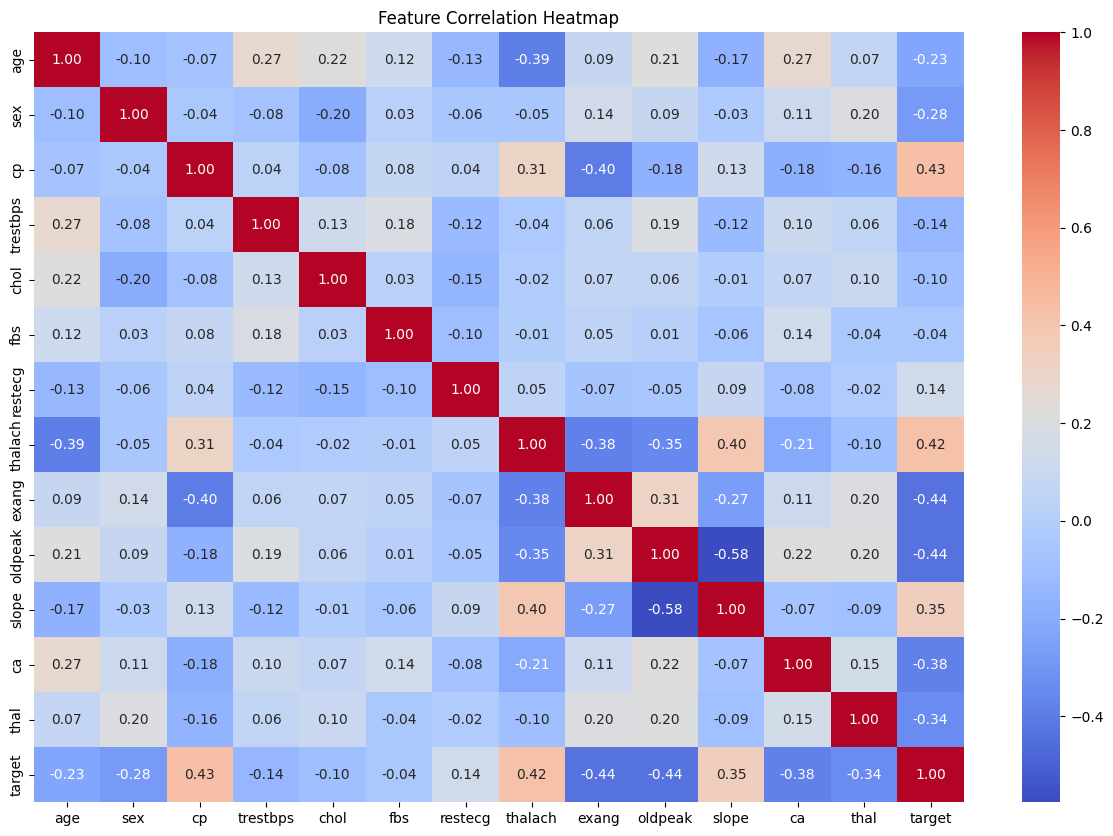

In [22]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

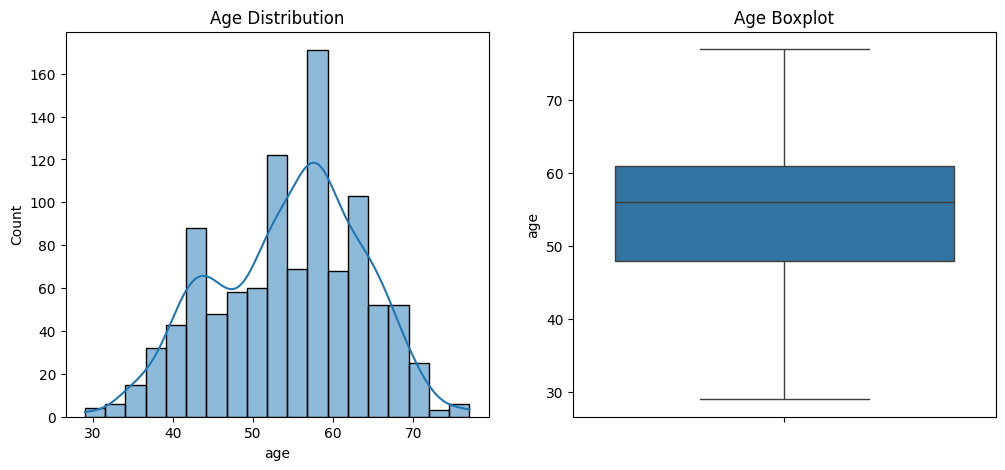

In [23]:
# Histograms & Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(df['age'])
plt.title('Age Boxplot')
plt.show()

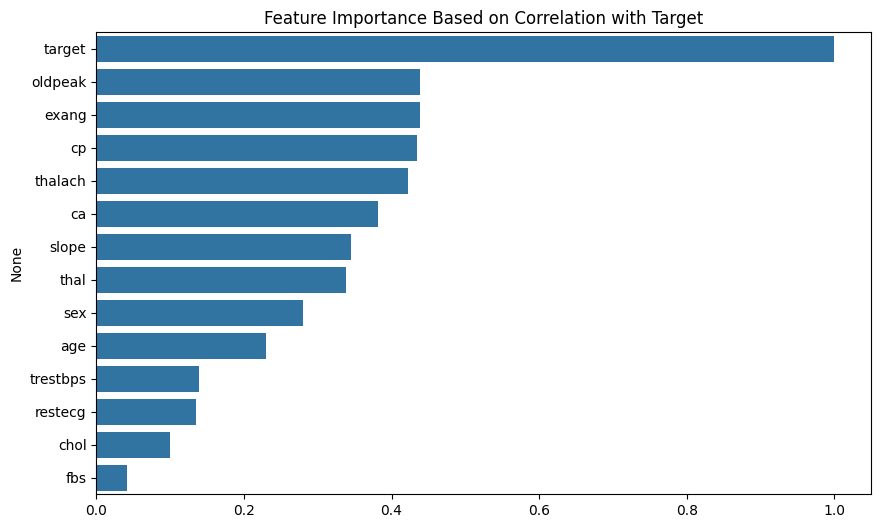

In [24]:
# Feature Importance Plot
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Importance Based on Correlation with Target')
plt.show()

In [25]:
# Create a subplot dashboard with multiple visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Age Distribution", "Correlation Heatmap", 
                    "Cholesterol Boxplot", "Feature Scatter Plot"),
    specs=[[{"type": "histogram"}, {"type": "heatmap"}],
           [{"type": "box"}, {"type": "scatter"}]]
)

# 1. Age Distribution (Histogram)
fig.add_trace(
    go.Histogram(x=df['age'], name="Age", marker_color='skyblue'),
    row=1, col=1
)

# 2. Correlation Heatmap
correlation_matrix = df.corr()
fig.add_trace(
    go.Heatmap(z=correlation_matrix.values, 
               x=correlation_matrix.columns, 
               y=correlation_matrix.columns, 
               colorscale='RdBu', zmin=-1, zmax=1),
    row=1, col=2
)

# 3. Cholesterol Boxplot
fig.add_trace(
    go.Box(y=df['chol'], name="Cholesterol", marker_color='lightgreen'),
    row=2, col=1
)

# 4. Scatter Plot (Age vs Cholesterol, colored by target)
fig.add_trace(
    go.Scatter(x=df['age'], y=df['chol'], mode='markers',
               marker=dict(color=df['target'], colorscale='Viridis', size=8),
               text=df['target'], showlegend=False),
    row=2, col=2
)

# Update layout for better appearance
fig.update_layout(
    height=800, width=1000,
    title_text="Heart Disease Visualization Dashboard",
    showlegend=False
)

# Add annotations for stats
fig.add_annotation(
    text=f"Mean Age: {df['age'].mean():.2f}<br>Mean Chol: {df['chol'].mean():.2f}",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False,
    font=dict(size=12)
)

# Show the interactive dashboard
pio.renderers.default = "browser"
fig.show()

# Print basic stats separately
print("Dataset Statistics:")
print(f"Total Records: {len(df)}")
print(f"Average Age: {df['age'].mean():.2f}")
print(f"Average Cholesterol: {df['chol'].mean():.2f}")
print(f"Heart Disease Prevalence: {df['target'].mean()*100:.2f}%")

Dataset Statistics:
Total Records: 1025
Average Age: 54.43
Average Cholesterol: 246.00
Heart Disease Prevalence: 51.32%
